# Online Shoppers Purchase Intentions Prediction with XGBoost

### Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

import xgboost as xgb

from xgboost import plot_importance

In [2]:
!pip install xgboost

### Step 2: Load and Explore the Data

**Load the dataset**

In [3]:
data = pd.read_csv("online_shoppers_intention.csv")

**Display basic information**

In [4]:
print("Dataset shape (Rows and Columns):", data.shape)

Dataset shape (Rows and Columns): (12330, 18)


In [5]:
print("\nFirst 5 rows:")
display(data.head())


First 5 rows:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
print("\nData types and missing values:")
print(data.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int

In [7]:
print("\nSummary statistics:")
display(data.describe(include="all"))


Summary statistics:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


### Step 3: Data Cleaning and Preprocessing

In [8]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [9]:
cat_cols = data.select_dtypes(include=["object", "category", "bool"]).columns

print("Categorical Variables:")
print(cat_cols)

Categorical Variables:
Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')


**Encode categorical variables**

1. Label Encoding:
   - Month (e.g., "Jan" -> 0, "Feb" -> 1, "Mar" -> 2)
   - VisitorType (e.g., "New" -> 0, "Returning" -> 1)

2. Boolean to Binary (1/0)

   - Weekend (True → 1, False → 0)
   - Revenue (Purchase? True → 1, False → 0)

In [10]:
label_encoder = LabelEncoder()
data["Month"] = label_encoder.fit_transform(data["Month"])
data["VisitorType"] = label_encoder.fit_transform(data["VisitorType"])
data["Weekend"] = data["Weekend"].astype(int)
data["Revenue"] = data["Revenue"].astype(int)

In [11]:
# Separate features and target
X = data.drop("Revenue", axis=1)
y = data["Revenue"]

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Scale numerical features (XGBoost doesn"t require scaling, but it can help with some metrics)
scaler = StandardScaler()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [14]:
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))


Class distribution in training set:
Revenue
0    0.845296
1    0.154704
Name: proportion, dtype: float64


In [15]:
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))


Class distribution in test set:
Revenue
0    0.845093
1    0.154907
Name: proportion, dtype: float64


### Step 4: Exploratory Data Analysis (EDA)

In [16]:
# Set style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Revenue Distribution (Target Variable)')

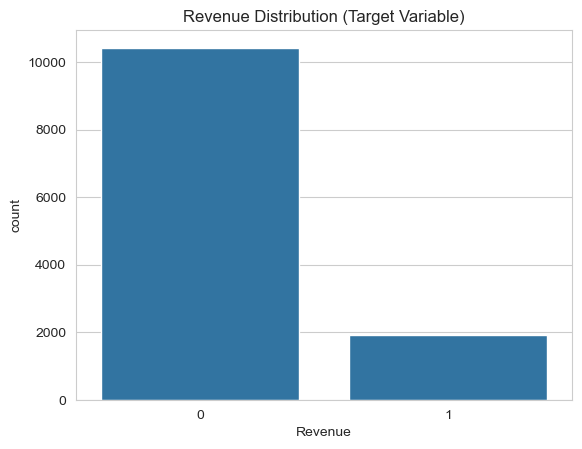

In [17]:
# 1. Target variable distribution
sns.countplot(x="Revenue", data=data)
plt.title("Revenue Distribution (Target Variable)")

Text(0.5, 1.0, 'Revenue by Visitor Type')

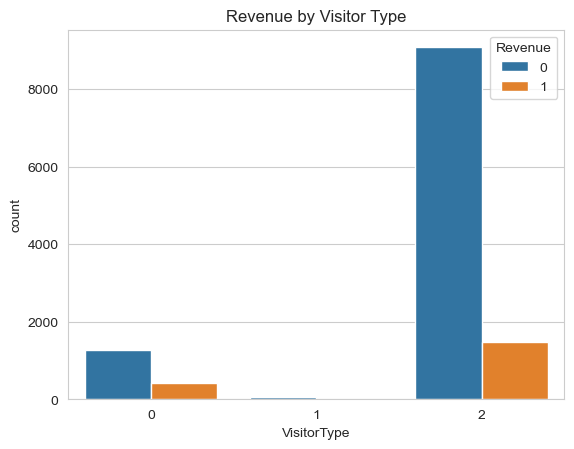

In [18]:
# 2. VisitorType vs Revenue
sns.countplot(x="VisitorType", hue="Revenue", data=data)
plt.title("Revenue by Visitor Type")


Text(0.5, 1.0, 'Revenue by Weekend')

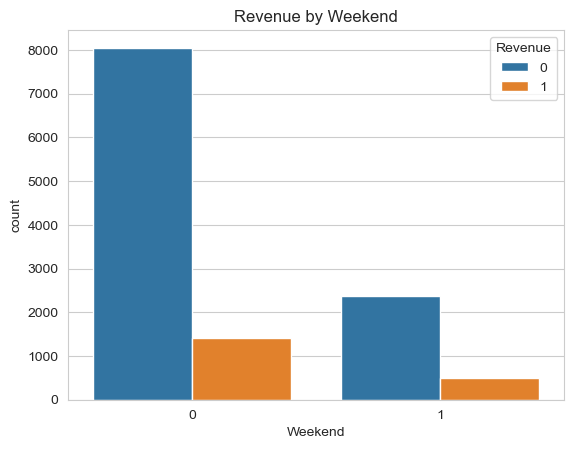

In [19]:
# 3. Weekend vs Revenue
sns.countplot(x="Weekend", hue="Revenue", data=data)
plt.title("Revenue by Weekend")

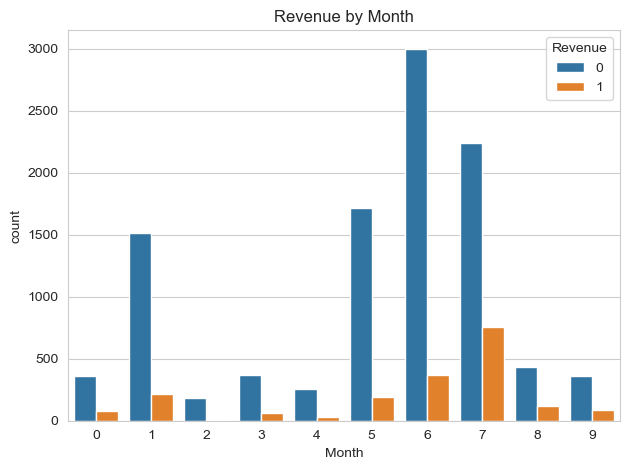

In [20]:
# 4. Month vs Revenue
sns.countplot(x="Month", hue="Revenue", data=data, order=sorted(data["Month"].unique()))
plt.title("Revenue by Month")
plt.tight_layout()
plt.show()

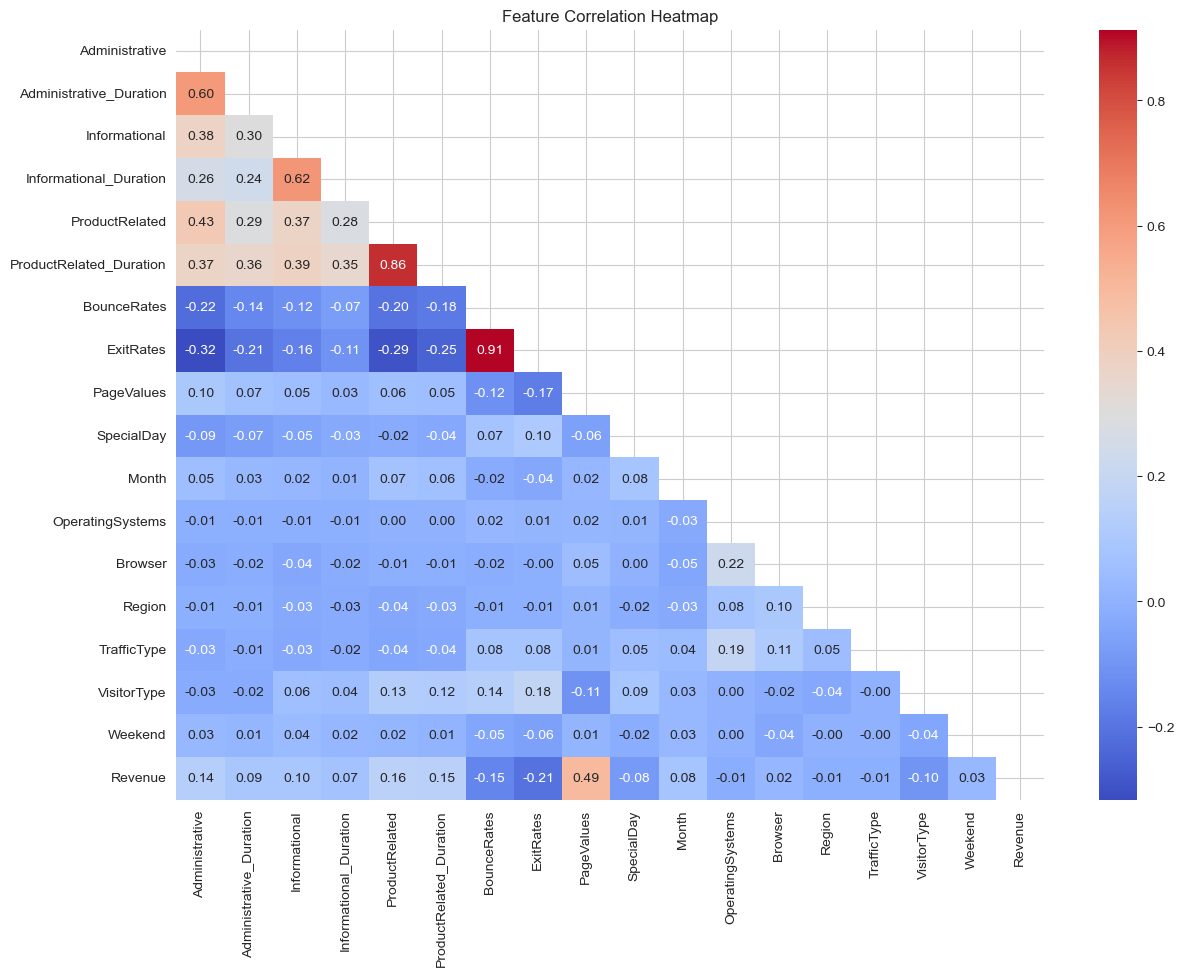

In [21]:
# 5. Correlation heatmap
plt.figure(figsize=(14, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", 
            mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title("Feature Correlation Heatmap")
plt.show()

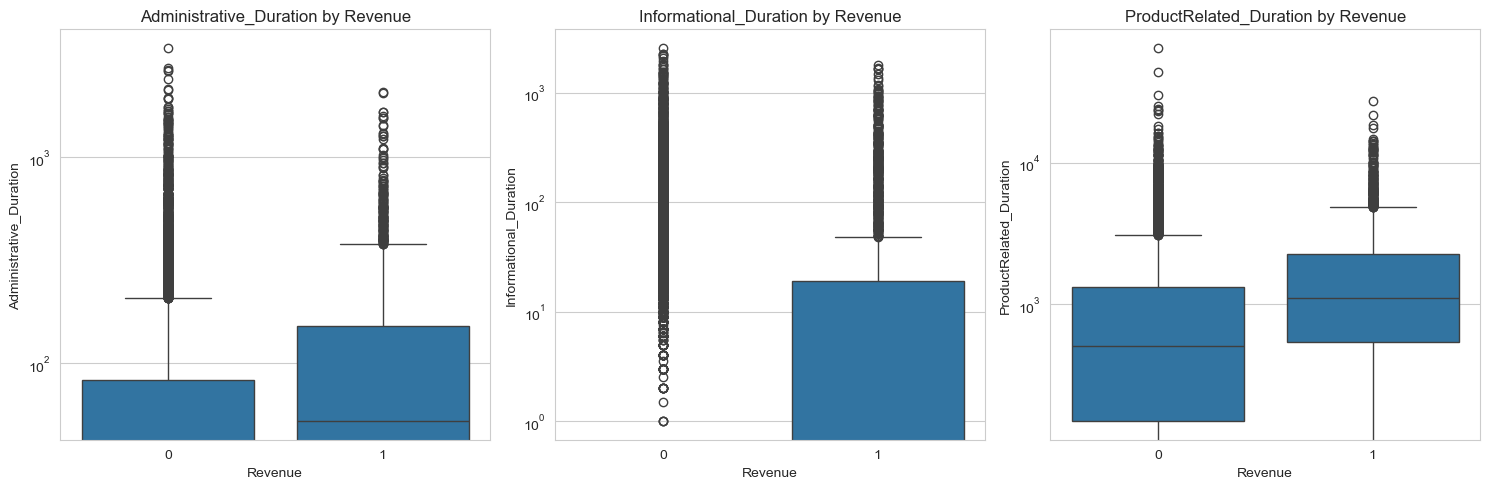

In [22]:
# 6. Duration features vs Revenue
duration_features = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]
plt.figure(figsize=(15, 5))
for i, feature in enumerate(duration_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Revenue", y=feature, data=data)
    plt.title(f"{feature} by Revenue")
    plt.yscale("log")  # Using log scale due to outliers
plt.tight_layout()
plt.show()

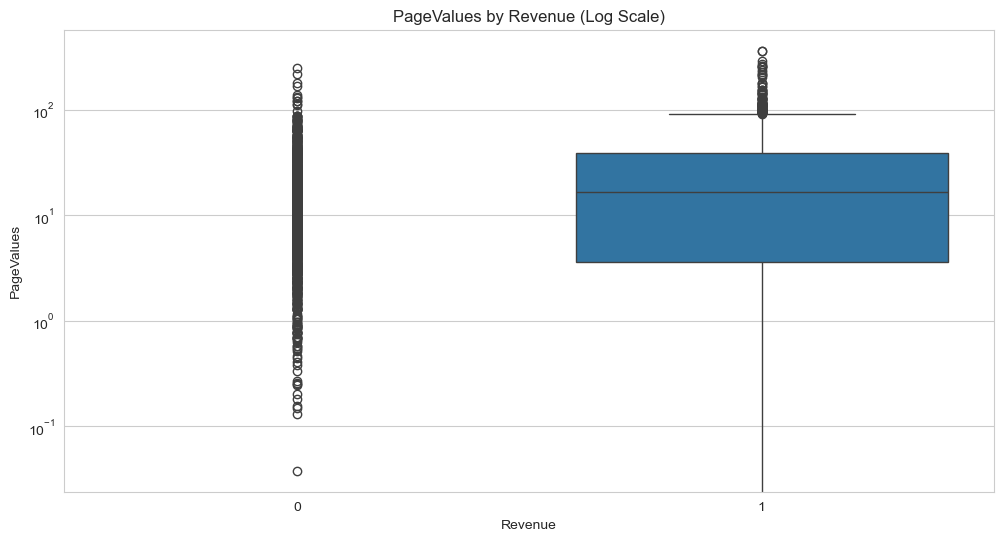

In [23]:
# 7. PageValues analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x="Revenue", y="PageValues", data=data)
plt.yscale("log")
plt.title("PageValues by Revenue (Log Scale)")
plt.show()

### Step 5: Build and Train XGBoost Model

In [24]:
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

In [25]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [26]:
# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

In [27]:
# Evaluate model
print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

Model Evaluation:
Accuracy: 0.8893
Precision: 0.6698
Recall: 0.5628
F1-Score: 0.6117
ROC-AUC Score: 0.9161


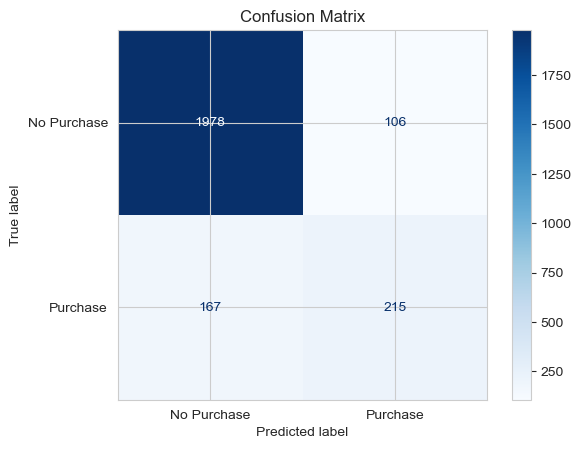

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Purchase", "Purchase"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

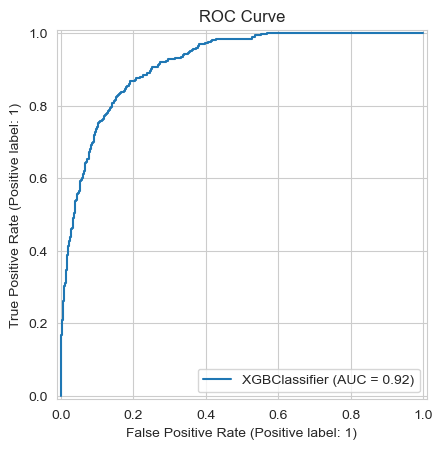

In [29]:
# ROC Curve
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

### Step 6: Feature Importance Analysis

<Figure size 1200x800 with 0 Axes>

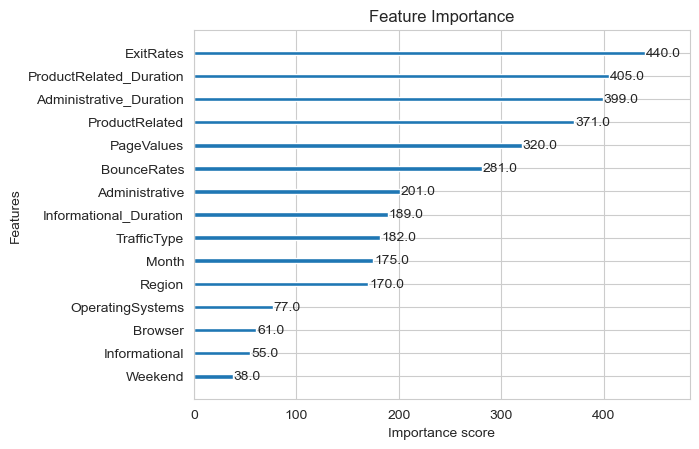

In [30]:
# Plot feature importance
plt.figure(figsize=(12, 8))
plot_importance(xgb_model, max_num_features=15)
plt.title("Feature Importance")
plt.show()

In [31]:
# Get feature importance as a dataframe
importance = xgb_model.get_booster().get_score(importance_type="weight")
importance_df = pd.DataFrame({
    "Feature": list(importance.keys()),
    "Importance": list(importance.values())
}).sort_values("Importance", ascending=False)

print("\nTop 10 Important Features:")
display(importance_df.head(10))


Top 10 Important Features:


,Feature,Importance
7,ExitRates,440.0
5,ProductRelated_Duration,405.0
1,Administrative_Duration,399.0
4,ProductRelated,371.0
8,PageValues,320.0
6,BounceRates,281.0
0,Administrative,201.0
3,Informational_Duration,189.0
14,TrafficType,182.0
10,Month,175.0


### Step 7: Hyperparameter Tuning with GridSearchCV

In [32]:
# Define parameter grid
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

In [33]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42
    ),
    param_grid=param_grid,
    cv=3,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)

In [34]:
# Perform grid search
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

In [35]:
# Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("\nBest Parameters:")
print(best_params)


Best Parameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


In [36]:
# Evaluate tuned model
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]

In [37]:
# Tuned Model Evaluation

y_pred_best = best_model.predict(X_test)

print("\nTuned Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1-Score:", f1_score(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Tuned Model Evaluation:
Accuracy: 0.9067315490673155
Precision: 0.7695035460992907
Recall: 0.5680628272251309
F1-Score: 0.6536144578313253
ROC-AUC: 0.7684364040156364

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      2084
           1       0.77      0.57      0.65       382

    accuracy                           0.91      2466
   macro avg       0.85      0.77      0.80      2466
weighted avg       0.90      0.91      0.90      2466



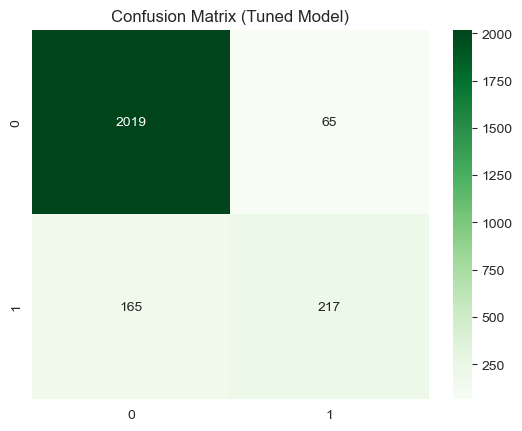

In [38]:
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Tuned Model)")
plt.show()

### Step 8: Final Model and Insights

<Figure size 1200x800 with 0 Axes>

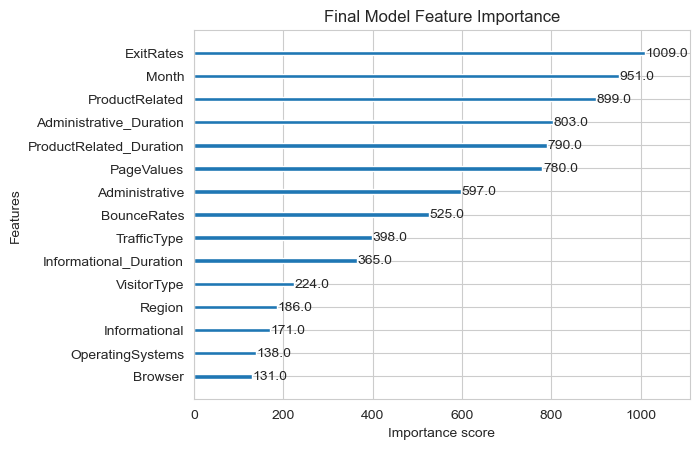

In [39]:
# Train final model with best parameters
final_model = xgb.XGBClassifier(
    **best_params,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)
final_model.fit(X_train, y_train)

# Feature importance from final model
plt.figure(figsize=(12, 8))
plot_importance(final_model, max_num_features=15)
plt.title("Final Model Feature Importance")
plt.show()
